
# 🎓 Delhi Housing Price Prediction – Teaching-Focused Version

---

## 📘 Objective of This Notebook

This notebook is designed for **teaching Machine Learning and Statistical Modeling**.

It focuses on:
- Understanding the data statistically
- Interpreting distributions mathematically
- Checking assumptions rigorously
- Understanding *why* models behave the way they do
- Connecting theory to implementation

---



# 📊 1️⃣ Descriptive Statistics (With Statistical Theory)

## Why Descriptive Statistics?

Descriptive statistics summarize the dataset using:

### 1. Measures of Central Tendency
- Mean → Sensitive to outliers
- Median → Robust to outliers
- Mode → Most frequent value

### 2. Measures of Dispersion
- Variance → Average squared deviation from mean
- Standard Deviation → Spread in original units
- IQR → Robust spread

### 3. Shape of Distribution
- Skewness → Asymmetry
- Kurtosis → Tail heaviness

In housing datasets:
- Prices are usually **right-skewed**
- Luxury properties create heavy tails

---


In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats


In [22]:

df = pd.read_csv('Indian_housing_Delhi_data.csv')
df.head()


,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [23]:

df.describe()


,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
count,5000.000000,5000.000000,5.000000e+03,4975.000000,2737.000000,0.0
mean,28.578012,77.174499,2.221738e+05,2.918593,1.954330,NaN
std,0.190186,0.115636,2.739843e+05,1.087823,0.547219,NaN
min,20.011379,72.771332,3.000000e+03,1.000000,1.000000,NaN
25%,28.544489,77.138248,2.950000e+04,2.000000,2.000000,NaN
50%,28.569295,77.196472,1.250000e+05,3.000000,2.000000,NaN
75%,28.618687,77.228950,3.011020e+05,4.000000,2.000000,NaN
max,28.805466,80.361313,3.010101e+06,10.000000,8.000000,NaN



### 📌 Teaching Interpretation

- If Mean >> Median → Right Skew
- Large Std Dev relative to Mean → High variability
- Large Range → Possible outliers

Next: Let us visually confirm distribution behavior.


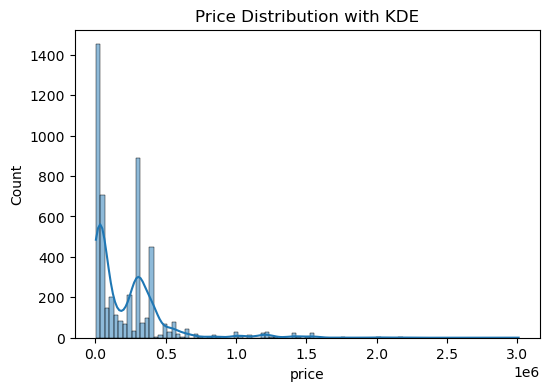

Skewness: 2.845385920876222
Kurtosis: 12.37246026743015


In [25]:

plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution with KDE")
plt.show()

print("Skewness:", df['price'].skew())
print("Kurtosis:", df['price'].kurt())



### Teaching Insight:

If skewness > 1 → Highly skewed  
If kurtosis > 3 → Heavy tails  

Housing price datasets almost always show:
- Positive skew
- High kurtosis

---



# 🔧 2️⃣ Feature Engineering (Conceptual Understanding)

Real-world datasets are messy.

We must:
- Convert text to numeric
- Handle missing values
- Remove leakage variables
- Convert categorical variables

Each transformation changes statistical properties.


In [28]:

df = df.drop(columns=['priceSqFt','currency','city','isNegotiable','description'], errors='ignore')

df['house_size'] = df['house_size'].str.replace(',', '', regex=True)
df['house_size'] = df['house_size'].str.extract('(\d+)').astype(float)

df['SecurityDeposit'] = df['SecurityDeposit'].replace('No Deposit', 0)
df['SecurityDeposit'] = df['SecurityDeposit'].str.extract('(\d+)').astype(float)

df.head()


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/26/w56ybb2s7tb9rmnhvsgnxtz80000gn/T/ipykernel_48413/3581910703.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['house_size'] = df['house_size'].str.extract('(\d+)').astype(float)
/var/folders/26/w56ybb2s7tb9rmnhvsgnxtz80000gn/T/ipykernel_48413/3581910703.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['SecurityDeposit'] = df['SecurityDeposit'].str.extract('(\d+)').astype(float)


,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,verificationDate,SecurityDeposit,Status
0,1 RK Studio Apartment,400.0,Kalkaji,28.545561,77.254349,22000,1.0,NaN,Posted a day ago,NaN,Furnished
1,1 RK Studio Apartment,400.0,Mansarover Garden,28.643259,77.132828,20000,1.0,NaN,Posted 9 days ago,NaN,Furnished
2,2 BHK Independent Floor,500.0,Uttam Nagar,28.618677,77.053352,8500,1.0,NaN,Posted 12 days ago,NaN,Semi-Furnished
3,3 BHK Independent House,1020.0,Model Town,28.712898,77.180000,48000,3.0,NaN,Posted a year ago,NaN,Furnished
4,2 BHK Apartment,810.0,Sector 13 Rohini,28.723539,77.131424,20000,2.0,NaN,Posted a year ago,NaN,Unfurnished



Notice how feature engineering changes:

- Data types
- Distributions
- Correlation structure

Let’s examine correlation next.


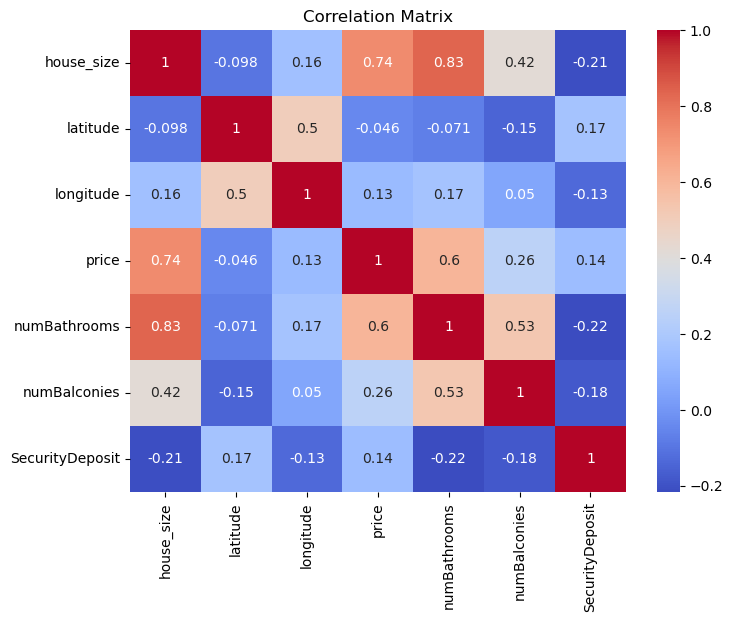

In [30]:

num_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



## 📘 What is Multicollinearity?

When two independent variables are highly correlated,
Linear Regression becomes unstable.

This affects:
- Coefficient interpretability
- Variance inflation
- Model reliability

We measure it using VIF.


In [32]:

X_vif = num_df.drop(columns=['price'])
X_vif = sm.add_constant(X_vif)

vif = pd.DataFrame()
vif["Feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i)
              for i in range(X_vif.shape[1])]

vif


MissingDataError: exog contains inf or nans


### Interpretation:

- VIF < 5 → Safe
- 5–10 → Moderate multicollinearity
- >10 → Serious issue

---



# 🧩 3️⃣ Missing Value Imputation

We use Median Imputation because:

- Robust to outliers
- Does not distort skewed distributions

Mean imputation would shift the distribution.


In [ ]:

num_cols = df.select_dtypes(include=np.number).columns

imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

df.isnull().sum()



# 🔤 4️⃣ Encoding

We use One-Hot Encoding.

Why?

Because linear regression assumes numeric input,
but categories have no ordinal meaning.

One-hot avoids introducing artificial ranking.


In [ ]:

df = pd.get_dummies(df, drop_first=True)
df.head()


In [ ]:

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# 📐 5️⃣ Linear Regression Assumptions

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of Residuals
5. No Multicollinearity

We already checked multicollinearity.
Now we test residual assumptions.


In [ ]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.show()


In [ ]:

# Normality Test
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

print("Shapiro Test:", stats.shapiro(residuals))



If residuals are not normal → consider log transformation of target.

---



# 🤖 6️⃣ Modeling & Interpretation

We compare:

Linear Regression → Parametric, interpretable  
Decision Tree → Non-linear, high variance  
Random Forest → Ensemble, low variance  

---


In [ ]:

def evaluate(model):
    y_pred = model.predict(X_test)
    print("R2:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:

# Linear Regression
evaluate(lr)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate(dt)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
evaluate(rf)



# ⭐ 7️⃣ Feature Importance – Conceptual Understanding

Random Forest Importance = 
Reduction in impurity averaged across trees.

Linear Regression Importance =
Magnitude of coefficients (after scaling).

Interpret with caution when multicollinearity exists.


In [ ]:

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)
